In [1]:
import os
import cv2
import numpy as np
from os import listdir
import time
import math
import matplotlib
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hcluster

In [2]:
video = cv2.VideoCapture("Match4Piece1.mp4");

# Find OpenCV version
(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')

if int(major_ver)  < 3 :
    fps = video.get(cv2.cv.CV_CAP_PROP_FPS)
    print ("Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps))
else :
    fps = video.get(cv2.CAP_PROP_FPS)
    print ("Frames per second using video.get(cv2.CAP_PROP_FPS) : {0}".format(fps))

video.release()

Frames per second using video.get(cv2.CAP_PROP_FPS) : 30.136703755056207


In [3]:
vidcap = cv2.VideoCapture("Match4Piece1.mp4")
success,image = vidcap.read()
count = 0
path = r"C:\Users\turke\Dropbox\turker-martin-shared\BGVision\TestVideos\images"
while success:
  cv2.imwrite(os.path.join(path, "frame%d.jpg" % count), cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

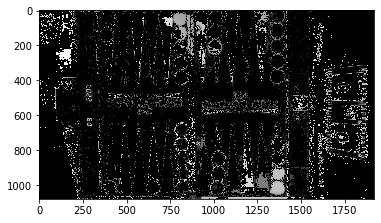

In [10]:
img1 = cv2.imread(os.path.join(path,"frame172.jpg"))
img2 = cv2.imread(os.path.join(path,"frame226.jpg"))
diff = cv2.absdiff(img1, img2)
mask = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

th = 2
imask =  mask>th

canvas = np.zeros_like(img2, np.uint8)
canvas[imask] = img2[imask]

cv2.imwrite("result.png", canvas)
plt.imshow(canvas)

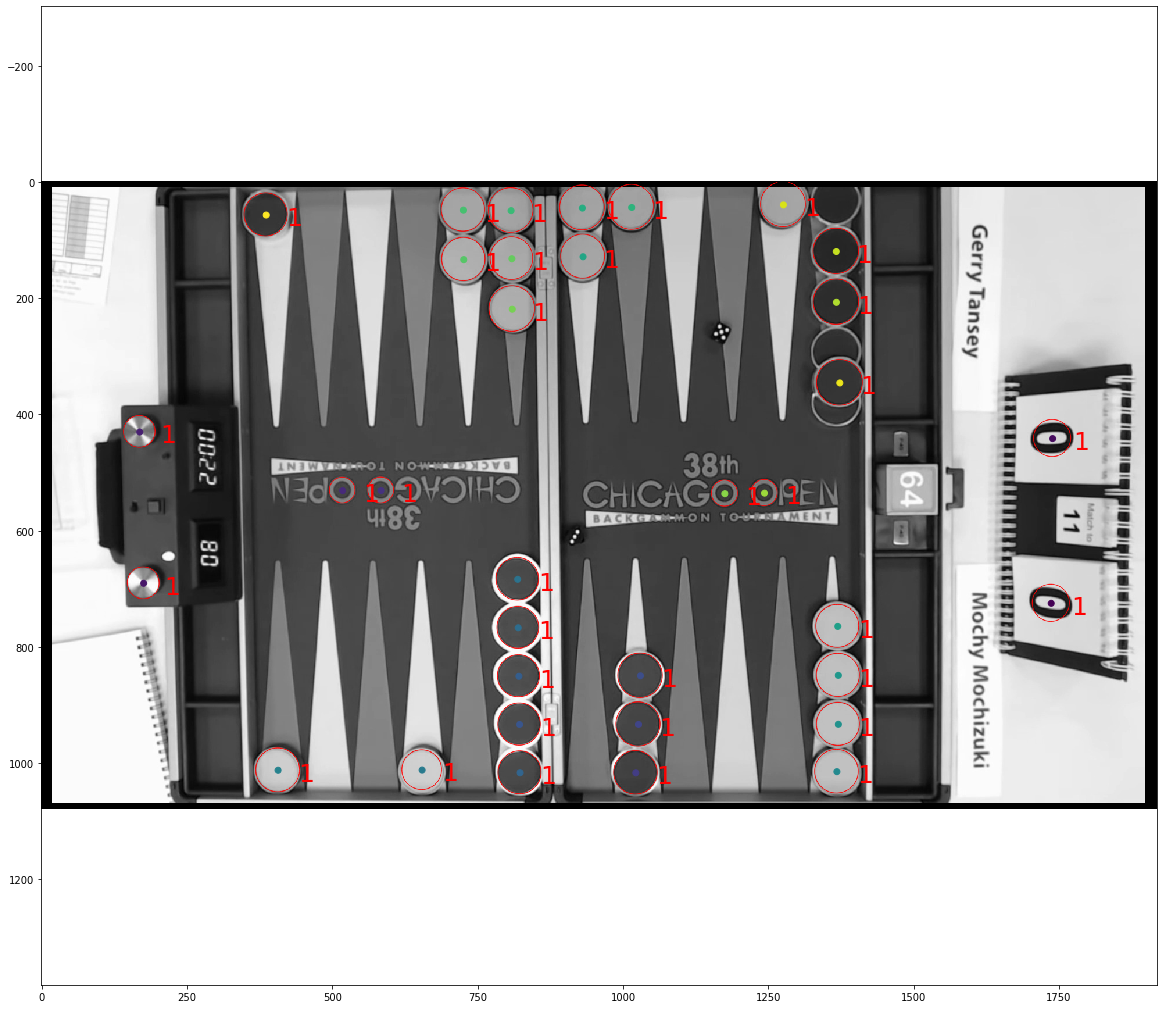

In [17]:
gray_image = cv2.imread(os.path.join(path,"frame693.jpg"))
x_range1 = int(gray_image.shape[0]*0.01)
x_range2 = int(gray_image.shape[0]*0.99)
y_range1 = int(gray_image.shape[1]*0.01)
y_range2 = int(gray_image.shape[1]*0.99)

# cropping out the outer border
gray_image[:,0:y_range1] = 0.0
gray_image[:,y_range2:] = 0.0
gray_image[:x_range1,:] = 0.0
gray_image[x_range2:,:] = 0.0

plt.figure(figsize=(20,18))

# setting the parameters for the blob_detection function of OpenCV
min_threshold = 50                     
max_threshold = 200                     
min_area = 1000                         
max_area = 5000
min_circularity = .4
min_inertia_ratio = .4

params = cv2.SimpleBlobDetector_Params()  
params.filterByArea = True
params.filterByCircularity = True
params.filterByInertia = True
params.minThreshold = min_threshold
params.maxThreshold = max_threshold
params.minArea = min_area
params.maxArea = max_area
params.minCircularity = min_circularity
params.minInertiaRatio = min_inertia_ratio

detector = cv2.SimpleBlobDetector_create(params) # create a blob detector object.
keypoints = detector.detect(gray_image) # keypoints is a list containing the detected blobs.
inv_image = cv2.bitwise_not(gray_image)
keypoints2 = detector.detect(inv_image)
im_with_keypoints = cv2.drawKeypoints(gray_image, keypoints+keypoints2, np.array([]), (0, 0, 255),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(cv2.cvtColor(im_with_keypoints, cv2.COLOR_BGR2RGB))

thresh = 20
X = np.array([list(i.pt) for i in keypoints+keypoints2])

# using hierarchical clustering to cluster the pips so that the pips belonging to
# different groups could be grouped separately
if len(X) > 0:
    clusters = hcluster.fclusterdata(X, thresh, criterion="distance")
    cluster_no = [np.sum(clusters==i) for i in clusters]
    num_dict = {np.where(clusters == i)[0][0]:np.sum(clusters==i) for i in np.unique(clusters)}
    key_map = {i:{np.sum(clusters==i):[X[np.where(np.array(clusters) == i)[0]]]} for i in np.unique(clusters)}
    for i,v in key_map.items():
        for j, k in v.items():
            plt.text(k[0][0][0]+35, k[0][0][1]+18, s=str(j), fontsize=25, color='red')
    # plotting
    plt.scatter(*np.transpose(X), c=clusters)
    plt.axis("equal")
    title = "threshold: %f, number of clusters: %d" % (thresh, len(set(clusters)))
plt.show()